In [1]:
import numpy as np
import pandas as pd
import sys, os, time
main_folder = './../'
if main_folder not in sys.path:
    sys.path.append(main_folder)
from evolution import DifferentialEvolution
from glob       import glob
from tqdm       import tqdm

import dirs
from utils      import get_solution, ProgressBar, write_log
import matplotlib.pyplot as plt 

progbar = ProgressBar(elapsed_time=True)

### Parameters

In [2]:
# Competition Parameters
funcId      = 1
dim         = 10
numRuns     = 2
targetError = 1e-8

# Algorithm Parameters
pop_size = 300
percMaxEvals = 1
maxEvals = 'auto'
maxGenerations = None
fitness_clusters = None
crossover = 'binonial'
mutation = 'best'
n_diff = 1
lambda_mutation = .5
opposition = False
input_data_filepath = './../input_data'
active = False

In [3]:
# Parameters
algorithm = "de"
mutation = "best"
n_diff = 1
crossover = "bin"
funcId = 7
dim = 30
numRuns = 51
pop_size = 300
percMaxEvals = 0.2
lambda_mutation = 0.5
opposition = False
fitness_clusters = None
input_data_filepath = "./input_data"
active = True


In [4]:
maxEvals = maxEvals if percMaxEvals is None else percMaxEvals*10000*dim
run_tag = '[' + '_'.join([str(funcId), 
                          str(dim), 
                          str(numRuns),
                          str(pop_size), 
                          str(percMaxEvals),                                                     
                          '{}'.format(lambda_mutation), 
                          str(opposition),
                          str(fitness_clusters)
                         ])  + ']'
run_tag

'[7_30_51_300_0.2_0.5_False_None]'

In [5]:
alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)

output_filepath = os.path.join(dirs.results, str(alg))
if not os.path.exists(output_filepath):
    os.makedirs(output_filepath)
output_filepath = output_filepath + '/' + run_tag

print ('Writing log at ', output_filepath + 'log.tsv')
write_log(filepath=output_filepath + 'log.tsv', 
          mode="w+", 
          text='[{}]\trun\telapsedTime\tsuccessRate\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime())))  

Writing log at 

./results/DE/best/1/bin/[7_30_51_300_0.2_0.5_False_None]log.tsv

In [6]:
hist = pd.DataFrame()
arr_runs = range(numRuns)
solution = get_solution(funcId, dim, input_data_filepath=input_data_filepath)
successRate = 0
for idx_run in arr_runs:
    progbar.update_progress(idx_run/float(len(arr_runs)))
    
    # Differential Evolution
    alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)
    
    errorHist, fitnessHist = alg.optimize(target=solution, max_f_evals=maxEvals, target_error=targetError, verbose=True)        
    bestError = errorHist.iloc[-1,:].min()
    errorHist["run"] = np.ones(errorHist.shape[0], dtype=int)*idx_run
    hist = pd.concat([hist, errorHist], ignore_index=False)    
    if bestError <= targetError:
        print ("Target error achieved with error {}".format(bestError))
        successRate += 1
    
    write_log(filepath=output_filepath + 'log.tsv', 
              text='[{}]\t{}/{}\t{}\t{}\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime()), 
                                              idx_run+1,
                                              len(arr_runs),
                                              progbar.get_elapsed_time(),
                                              successRate)
             )
    
hist.index.name = 'generation'
hist.to_csv(output_filepath + 'hist.tsv', sep='\t')
progbar.update_progress(1)

[0:00:00][----------] 0.00% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	725.6059

Best Fitness:	714.1615
Solution:	700.0000
Diff:		14.1615

[0:09:21][----------] 1.96% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	722.7183

Best Fitness:	710.0049
Solution:	700.0000
Diff:		10.0049

[0:16:13][----------] 3.92% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	721.2828

Best Fitness:	712.7431
Solution:	700.0000
Diff:		12.7431

[0:23:13][#---------] 5.88% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	719.6982

Best Fitness:	711.6987
Solution:	700.0000
Diff:		11.6987

[0:30:27][#---------] 7.84% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	727.6828

Best Fitness:	714.2118
Solution:	700.0000
Diff:		14.2118

[0:37:20][#---------] 9.80% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	725.0581

Best Fitness:	713.4990
Solution:	700.0000
Diff:		13.4990

[0:43:41][#---------] 11.76% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	724.1367

Best Fitness:	713.3451
Solution:	700.0000
Diff:		13.3451

[0:50:42][#---------] 13.73% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	727.0512

Best Fitness:	714.3044
Solution:	700.0000
Diff:		14.3044

[0:57:59][##--------] 15.69% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	718.7572

Best Fitness:	709.0490
Solution:	700.0000
Diff:		9.0490

[1:04:36][##--------] 17.65% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	729.7497

Best Fitness:	713.5187
Solution:	700.0000
Diff:		13.5187

[1:11:30][##--------] 19.61% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	722.0057

Best Fitness:	712.0265
Solution:	700.0000
Diff:		12.0265

[1:18:15][##--------] 21.57% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	722.4173

Best Fitness:	709.6621
Solution:	700.0000
Diff:		9.6621

[1:25:01][##--------] 23.53% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	725.9414

Best Fitness:	715.1086
Solution:	700.0000
Diff:		15.1086

[1:31:56][###-------] 25.49% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	729.0666

Best Fitness:	715.6953
Solution:	700.0000
Diff:		15.6953

[1:38:40][###-------] 27.45% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	720.9715

Best Fitness:	711.8892
Solution:	700.0000
Diff:		11.8892

[1:45:13][###-------] 29.41% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	716.7870

Best Fitness:	708.4155
Solution:	700.0000
Diff:		8.4155

[1:52:10][###-------] 31.37% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	716.0144

Best Fitness:	708.6373
Solution:	700.0000
Diff:		8.6373

[1:59:05][###-------] 33.33% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	728.5849

Best Fitness:	715.8427
Solution:	700.0000
Diff:		15.8427

[2:05:27][####------] 35.29% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	724.3199

Best Fitness:	713.3518
Solution:	700.0000
Diff:		13.3518

[2:12:28][####------] 37.25% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	719.5053

Best Fitness:	711.5709
Solution:	700.0000
Diff:		11.5709

[2:19:11][####------] 39.22% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	715.4001

Best Fitness:	708.6265
Solution:	700.0000
Diff:		8.6265

[2:25:59][####------] 41.18% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	734.2790

Best Fitness:	716.5546
Solution:	700.0000
Diff:		16.5546

[2:32:35][####------] 43.14% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	714.5503

Best Fitness:	707.8959
Solution:	700.0000
Diff:		7.8959

[2:39:32][#####-----] 45.10% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	729.5899

Best Fitness:	711.5716
Solution:	700.0000
Diff:		11.5716

[2:46:28][#####-----] 47.06% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	716.1338

Best Fitness:	708.6553
Solution:	700.0000
Diff:		8.6553

[2:52:37][#####-----] 49.02% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	720.9998

Best Fitness:	710.0479
Solution:	700.0000
Diff:		10.0479

[2:58:48][#####-----] 50.98% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	730.1867

Best Fitness:	717.7568
Solution:	700.0000
Diff:		17.7568

[3:05:04][#####-----] 52.94% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	717.6202

Best Fitness:	708.4562
Solution:	700.0000
Diff:		8.4562

[3:11:12][#####-----] 54.90% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	719.2954

Best Fitness:	710.2088
Solution:	700.0000
Diff:		10.2088

[3:17:18][######----] 56.86% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	723.7148

Best Fitness:	710.6421
Solution:	700.0000
Diff:		10.6421

[3:23:20][######----] 58.82% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	724.9917

Best Fitness:	712.4431
Solution:	700.0000
Diff:		12.4431

[3:29:09][######----] 60.78% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	717.6501

Best Fitness:	709.4692
Solution:	700.0000
Diff:		9.4692

[3:35:04][######----] 62.75% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	722.8901

Best Fitness:	712.3775
Solution:	700.0000
Diff:		12.3775

[3:41:02][######----] 64.71% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	727.0218

Best Fitness:	713.8471
Solution:	700.0000
Diff:		13.8471

[3:47:13][#######---] 66.67% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	723.4362

Best Fitness:	714.1527
Solution:	700.0000
Diff:		14.1527

[3:53:10][#######---] 68.63% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	724.3128

Best Fitness:	712.9085
Solution:	700.0000
Diff:		12.9085

[3:58:56][#######---] 70.59% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	726.3412

Best Fitness:	707.5947
Solution:	700.0000
Diff:		7.5947

[4:05:07][#######---] 72.55% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	715.3460

Best Fitness:	707.2351
Solution:	700.0000
Diff:		7.2351

[4:11:20][#######---] 74.51% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	721.6007

Best Fitness:	711.5867
Solution:	700.0000
Diff:		11.5867

[4:17:26][########--] 76.47% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	717.0795

Best Fitness:	709.9144
Solution:	700.0000
Diff:		9.9144

[4:23:20][########--] 78.43% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	720.3130

Best Fitness:	709.5952
Solution:	700.0000
Diff:		9.5952

[4:29:29][########--] 80.39% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	716.1746

Best Fitness:	708.3092
Solution:	700.0000
Diff:		8.3092

[4:35:17][########--] 82.35% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	726.0665

Best Fitness:	712.6616
Solution:	700.0000
Diff:		12.6616

[4:41:35][########--] 84.31% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	729.9349

Best Fitness:	714.9207
Solution:	700.0000
Diff:		14.9207

[4:47:24][#########-] 86.27% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	715.5986

Best Fitness:	709.3394
Solution:	700.0000
Diff:		9.3394

[4:53:33][#########-] 88.24% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	734.3700

Best Fitness:	715.7812
Solution:	700.0000
Diff:		15.7812

[4:59:35][#########-] 90.20% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	714.6228

Best Fitness:	708.2388
Solution:	700.0000
Diff:		8.2388

[5:05:30][#########-] 92.16% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	726.0690

Best Fitness:	711.9155
Solution:	700.0000
Diff:		11.9155

[5:11:31][#########-] 94.12% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	718.8091

Best Fitness:	709.2993
Solution:	700.0000
Diff:		9.2993

[5:17:44][##########] 96.08% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	718.1269

Best Fitness:	709.7404
Solution:	700.0000
Diff:		9.7404

[5:23:47][##########] 98.04% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	716.3832

Best Fitness:	708.3796
Solution:	700.0000
Diff:		8.3796

[5:29:56][##########] 100.00% Done...


In [7]:
print ("Elapsed Time: ", progbar.get_elapsed_time())

Elapsed Time: 

5:29:56

In [8]:
errorHist.tail()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,run
generation,,,,,,,,,,,,,,,,,,,,,
193,17.271565,20.330862,17.082488,19.109656,14.144855,13.02071,22.222681,17.99635,18.215769,13.379538,...,18.216172,12.48612,19.934726,16.130623,15.230042,12.320922,14.811862,13.718547,11.541776,50
194,17.271565,20.330862,17.082488,19.109656,13.460754,13.02071,22.222681,17.99635,18.215769,13.379538,...,18.216172,12.48612,19.934726,16.130623,15.230042,12.320922,14.811862,13.718547,11.541776,50
195,17.271565,14.319891,17.082488,19.109656,13.460754,13.02071,14.020604,17.99635,18.215769,13.379538,...,13.499591,12.48612,19.934726,16.130623,15.230042,12.320922,14.811862,13.718547,11.541776,50
196,17.271565,14.319891,17.082488,17.094821,13.460754,13.02071,14.020604,17.99635,16.552829,13.379538,...,13.499591,12.48612,19.934726,16.130623,15.230042,12.320922,14.811862,13.718547,11.541776,50
197,17.271565,14.319891,17.082488,17.094821,13.460754,13.02071,14.020604,17.99635,16.552829,13.379538,...,13.499591,12.48612,19.934726,16.130623,15.230042,12.320922,14.811862,13.718547,11.541776,50


In [9]:
arr_error = list()
arr_best_error = list()
for run in hist['run'].unique():
    df_run = hist[hist['run'] == run].drop(['run'], axis=1) 
    bestError = df_run.iloc[-1,:].min()    
    arr_best_error.append(bestError)    
    print ('Best error for run {}: {}'.format(run, bestError))
    arr_error.append(np.array(df_run.min(axis=1)))    
arr_error = np.array(arr_error)
# arr_error

Best error for run 0: 14.161507274777364

Best error for run 1: 10.00485543756281

Best error for run 2: 12.743075016812327

Best error for run 3: 11.69874858888545

Best error for run 4: 14.211843862907017

Best error for run 5: 13.49895291166797

Best error for run 6: 13.345123436362996

Best error for run 7: 14.304429305628446

Best error for run 8: 9.048983053110305

Best error for run 9: 13.518678442800365

Best error for run 10: 12.026463518612331

Best error for run 11: 9.662134120047313

Best error for run 12: 15.108602979020588

Best error for run 13: 15.695305036422269

Best error for run 14: 11.889230343656095

Best error for run 15: 8.415541187576537

Best error for run 16: 8.637348301980296

Best error for run 17: 15.842671186211874

Best error for run 18: 13.351842880475374

Best error for run 19: 11.570914369869229

Best error for run 20: 8.62653665232449

Best error for run 21: 16.55460127746926

Best error for run 22: 7.895935073772989

Best error for run 23: 11.57160239490588

Best error for run 24: 8.655281359283777

Best error for run 25: 10.04785474214907

Best error for run 26: 17.75680128488625

Best error for run 27: 8.45623977078526

Best error for run 28: 10.20879511756607

Best error for run 29: 10.642097697042573

Best error for run 30: 12.443094098898428

Best error for run 31: 9.469152586347946

Best error for run 32: 12.377492854231491

Best error for run 33: 13.847053875842448

Best error for run 34: 14.152724554342399

Best error for run 35: 12.908495943223329

Best error for run 36: 7.594695434694813

Best error for run 37: 7.235113011850444

Best error for run 38: 11.586736123294827

Best error for run 39: 9.914426122353461

Best error for run 40: 9.595161164577007

Best error for run 41: 8.309154396598274

Best error for run 42: 12.661594115358639

Best error for run 43: 14.92074188012134

Best error for run 44: 9.339414658381997

Best error for run 45: 15.7811704476959

Best error for run 46: 8.238813592502652

Best error for run 47: 11.915510216042549

Best error for run 48: 9.29929725544821

Best error for run 49: 9.740368804412697

Best error for run 50: 8.379561441359897

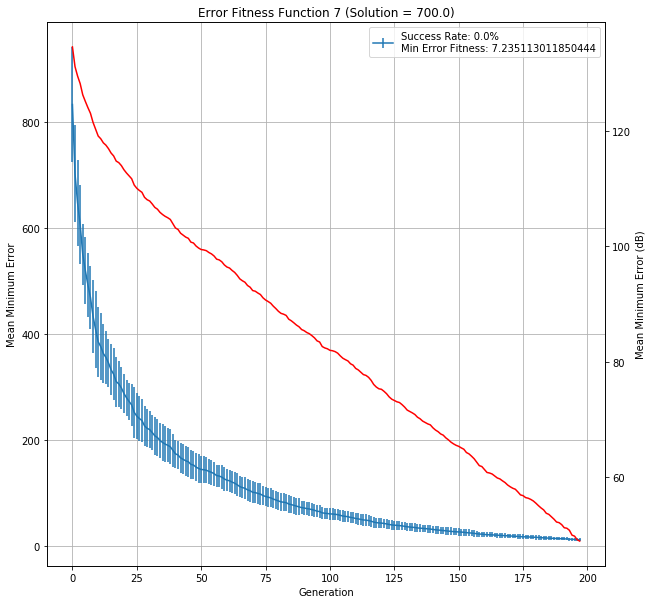

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
label = 'Success Rate: {}%\nMin Error Fitness: {}'.format(100*(successRate/float(numRuns)), arr_error.min())
ax.errorbar(np.arange(alg.generations), arr_error.mean(axis=0), yerr=arr_error.std(axis=0), label=label)
ax2 = ax.twinx()
ax2.plot(np.arange(alg.generations), 20*np.log(arr_error.mean(axis=0)), label='Mean Min Error (dB)', color='red')
ax2.set_ylabel('Mean Minimum Error (dB)')

ax.grid(True)
ax.set_ylabel('Mean Minimum Error')
ax.legend()
ax.set_xlabel('Generation')
ax.set_title('Error Fitness Function {} (Solution = {})'.format(funcId, solution))
plt.savefig(output_filepath + 'mean_error_evolution.jpeg', bbox_inches = 'tight')

In [11]:
df_sumup = pd.DataFrame(columns=['algorithm', '#Fc', 'D', 'percFES'] + ['run_' + str(i) for i in np.arange(1,numRuns+1,1)] + ['mean', 'elapsed_time', 'evals'])
df_sumup.loc[df_sumup.shape[0]] = [str(alg), funcId, dim, percMaxEvals] + arr_best_error + [np.mean(arr_best_error), progbar.get_elapsed_time(), alg.fitnessEvals]
print ('Saving df_sumup to ', output_filepath + 'df_sumup.tsv')
df_sumup.to_csv(output_filepath + 'df_sumup.tsv', sep='\t')
df_sumup

Saving df_sumup to 

./results/DE/best/1/bin/[7_30_51_300_0.2_0.5_False_None]df_sumup.tsv

,algorithm,#Fc,D,percFES,run_1,run_2,run_3,run_4,run_5,run_6,...,run_45,run_46,run_47,run_48,run_49,run_50,run_51,mean,elapsed_time,evals
0,DE/best/1/bin,7,30,0.2,14.161507,10.004855,12.743075,11.698749,14.211844,13.498953,...,9.339415,15.78117,8.238814,11.91551,9.299297,9.740369,8.379561,11.546309,5:29:56,60000
